In [9]:
# Dados e visualização científica 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import scienceplots 

from matplotlib.ticker import MaxNLocator
mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'  # opcional, deixa limites mais bonitos
mpl.ticker.MaxNLocator.default_params['nbins'] = 10    # força no máximo 10 ticks em todos os eixos


plt.style.use('science') 

In [10]:
# Cores 
cor_1 = '#fc863d'

In [11]:
# Dados de visualizações 
# A forma como a meta disponibiliza os dados mudou 
# As métricas de visualizações não estão disponíveis para 
# 2024, apenas para 2025. 
# 

vis_25 = pd.read_csv('../data_14_09_24_a_14_09_25/Visualizações.csv',encoding="utf-16", sep=',',skiprows=2)
vis_25
vis_25['Data'] = pd.to_datetime(vis_25['Data'])
vis_25['Data'] = vis_25['Data'].dt.date 

# faz uma coluna nova com o dia da semana de cada data 
vis_25['Dia da Semana'] = pd.to_datetime(vis_25['Data']).dt.day_name()

# Mudar o nome dos dias da semana para portugues 
dias_semana = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
vis_25['Dia da Semana'] = vis_25['Dia da Semana'].map(dias_semana)
vis_25

,Data,Primary,Dia da Semana
0,2024-09-14,0,Sábado
1,2024-09-15,0,Domingo
2,2024-09-16,0,Segunda-feira
3,2024-09-17,0,Terça-feira
4,2024-09-18,0,Quarta-feira
...,...,...,...
361,2025-09-10,8280,Quarta-feira
362,2025-09-11,3774,Quinta-feira
363,2025-09-12,4456,Sexta-feira
364,2025-09-13,2809,Sábado


In [12]:
vis_25_sem = vis_25[['Dia da Semana','Primary']][2:-1].groupby('Dia da Semana').sum().reset_index()
vis_25_sem = vis_25_sem.reindex([3,6,1,2,4,5,0])  # Reordena os dias da semana
vis_25_sem

,Dia da Semana,Primary
3,Segunda-feira,58043
6,Terça-feira,47982
1,Quarta-feira,52316
2,Quinta-feira,30781
4,Sexta-feira,49781
5,Sábado,35529
0,Domingo,20972


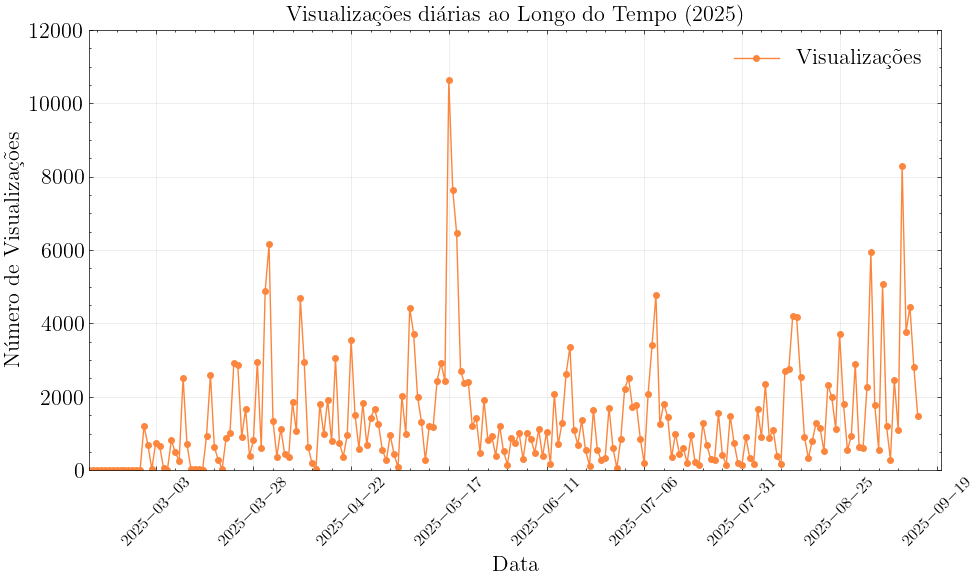

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))  # cria figura + eixos

ax.plot(vis_25['Data'], vis_25['Primary'], marker='o',ms=4, label='Visualizações',color=cor_1)

ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Número de Visualizações',fontsize=16)
ax.set_title('Visualizações diárias ao Longo do Tempo (2025)',fontsize=16)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # força no máximo 10 ticks no eixo x
ax.tick_params(axis='x', rotation=45,labelsize=12)  # rotaciona os ticks do eixo x
ax.tick_params(axis='y',labelsize=16) 

ax.set_xlim([pd.to_datetime('2025-02-14'),pd.to_datetime('2025-09-20')])
ax.set_ylim([0.0,12000])

ax.legend(fontsize=16)
fig.tight_layout()

plt.grid(alpha=0.3)
plt.show()

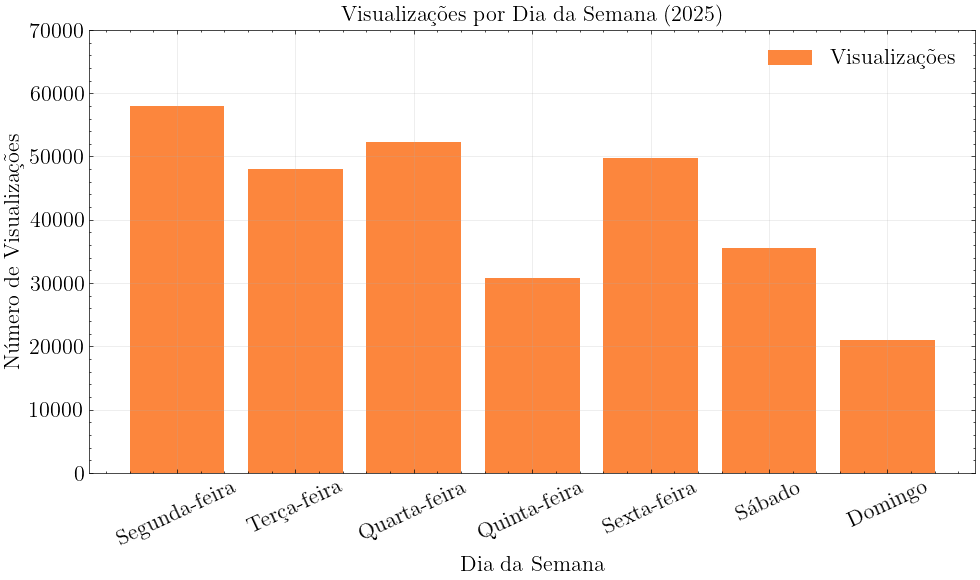

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))  # cria figura + eixos

ax.bar(vis_25_sem['Dia da Semana'], vis_25_sem['Primary'],label='Visualizações',color=cor_1)

ax.set_xlabel('Dia da Semana',fontsize=16)
ax.set_ylabel('Número de Visualizações',fontsize=16)
ax.set_title('Visualizações por Dia da Semana (2025)',fontsize=16)

# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # força no máximo 10 ticks no eixo x
ax.tick_params(axis='x', rotation=25,labelsize=16)  # rotaciona os ticks do eixo x
ax.tick_params(axis='y',labelsize=16) 

# ax.set_xlim([pd.to_datetime('2025-02-14'),pd.to_datetime('2025-09-20')])
# ax.set_ylim([0.0,12000])

ax.legend(fontsize=16)
fig.tight_layout()

plt.grid(alpha=0.3)
plt.show()

In [15]:
# Dados de Alcance 
# Só existem dados de 2023 -> 2025 
# Um pouco melhor que o anterior. 

alc_24 = pd.read_csv('../data_14_09_23_a_14_09_24/Alcance.csv',encoding="utf-16", sep=',',skiprows=2)
alc_25 = pd.read_csv('../data_14_09_24_a_14_09_25/Alcance.csv',encoding="utf-16", sep=',',skiprows=2)

# Concatena os dois dataframes
alc_ = pd.concat([alc_24,alc_25],ignore_index=True).reset_index(drop=True)
# Dropa os duplicados em data 
alc_ = alc_.drop_duplicates(subset=['Data'])
alc_['Data'] = pd.to_datetime(alc_['Data'])
alc_['Data'] = alc_['Data'].dt.date

# Adiciona coluna com dia da semana
alc_['Dia da Semana'] = pd.to_datetime(alc_['Data']).dt.day_name()
alc_['Dia da Semana'] = alc_['Dia da Semana'].map(dias_semana)

alc_ 

,Data,Primary,Dia da Semana
0,2023-09-14,0,Quinta-feira
1,2023-09-15,0,Sexta-feira
2,2023-09-16,0,Sábado
3,2023-09-17,0,Domingo
4,2023-09-18,0,Segunda-feira
...,...,...,...
728,2025-09-10,1709,Quarta-feira
729,2025-09-11,963,Quinta-feira
730,2025-09-12,820,Sexta-feira
731,2025-09-13,713,Sábado


In [16]:
alc_sem = alc_[['Dia da Semana','Primary']][2:-1].groupby('Dia da Semana').sum().reset_index()
alc_sem = alc_sem.reindex([3,6,1,2,4,5,0])  # Reordena os dias da semana
alc_sem

,Dia da Semana,Primary
3,Segunda-feira,37805
6,Terça-feira,34134
1,Quarta-feira,43496
2,Quinta-feira,30658
4,Sexta-feira,47977
5,Sábado,29906
0,Domingo,17771


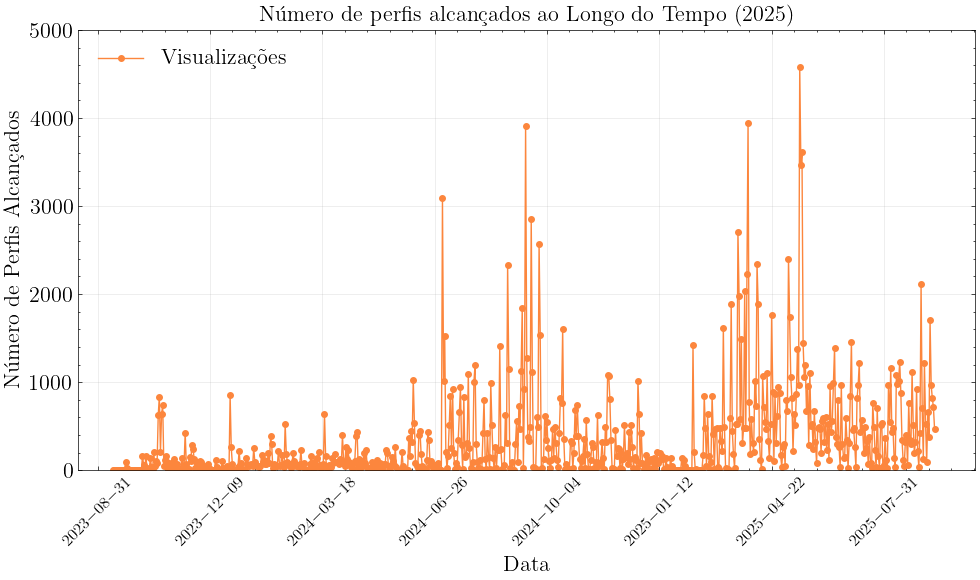

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))  # cria figura + eixos

ax.plot(alc_['Data'], alc_['Primary'], marker='o',ms=4, label='Visualizações',color=cor_1)

ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Número de Perfis Alcançados',fontsize=16)
ax.set_title('Número de perfis alcançados ao Longo do Tempo (2025)',fontsize=16)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # força no máximo 10 ticks no eixo x
ax.tick_params(axis='x', rotation=45,labelsize=12)  # rotaciona os ticks do eixo x
ax.tick_params(axis='y',labelsize=16) 

ax.set_xlim([pd.to_datetime('2023-08-14'),pd.to_datetime('2025-10-20')])
ax.set_ylim([0.0,5000])

ax.legend(fontsize=16)
fig.tight_layout()

plt.grid(alpha=0.3)
plt.show()

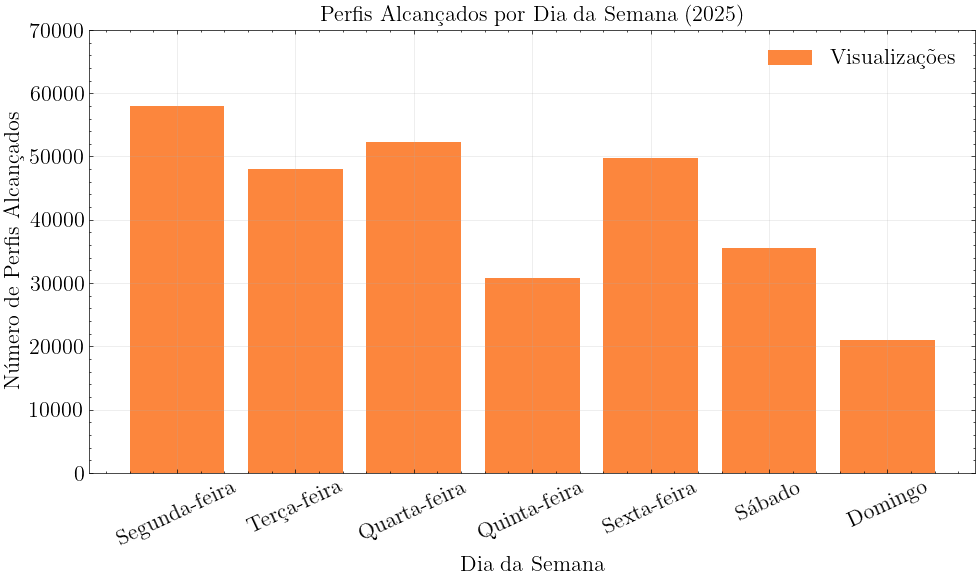

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))  # cria figura + eixos

ax.bar(vis_25_sem['Dia da Semana'], vis_25_sem['Primary'],label='Visualizações',color=cor_1)

ax.set_xlabel('Dia da Semana',fontsize=16)
ax.set_ylabel('Número de Perfis Alcançados',fontsize=16)
ax.set_title('Perfis Alcançados por Dia da Semana (2025)',fontsize=16)

# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # força no máximo 10 ticks no eixo x
ax.tick_params(axis='x', rotation=25,labelsize=16)  # rotaciona os ticks do eixo x
ax.tick_params(axis='y',labelsize=16) 

# ax.set_xlim([pd.to_datetime('2025-02-14'),pd.to_datetime('2025-09-20')])
# ax.set_ylim([0.0,12000])

ax.legend(fontsize=16)
fig.tight_layout()

plt.grid(alpha=0.3)
plt.show()

In [19]:
# Dados de Visitas 
# O mesmo que o de alcance.

visitas_24 = pd.read_csv('../data_14_09_23_a_14_09_24/Visitas.csv',encoding="utf-16", sep=',',skiprows=2)
visitas_25 = pd.read_csv('../data_14_09_24_a_14_09_25/Visitas.csv',encoding="utf-16", sep=',',skiprows=2)

# concatena os dois dataframes
visitas_ = pd.concat([visitas_24,visitas_25],ignore_index=True).reset_index(drop=True)
# dropa os duplicados em data 
visitas_ = visitas_.drop_duplicates(subset=['Data'])
visitas_['Data'] = pd.to_datetime(visitas_['Data'])
visitas_['Data'] = visitas_['Data'].dt.date 

# faz uma coluna nova com o dia da semana de cada data
visitas_['Dia da Semana'] = pd.to_datetime(visitas_['Data']).dt.day_name()
visitas_['Dia da Semana'] = visitas_['Dia da Semana'].map(dias_semana)


alc_sem = alc_[['Dia da Semana','Primary']][2:-1].groupby('Dia da Semana').sum().reset_index()
alc_sem = alc_sem.reindex([3,6,1,2,4,5,0])  # Reordena os dias da semana
alc_sem

,Dia da Semana,Primary
3,Segunda-feira,37805
6,Terça-feira,34134
1,Quarta-feira,43496
2,Quinta-feira,30658
4,Sexta-feira,47977
5,Sábado,29906
0,Domingo,17771


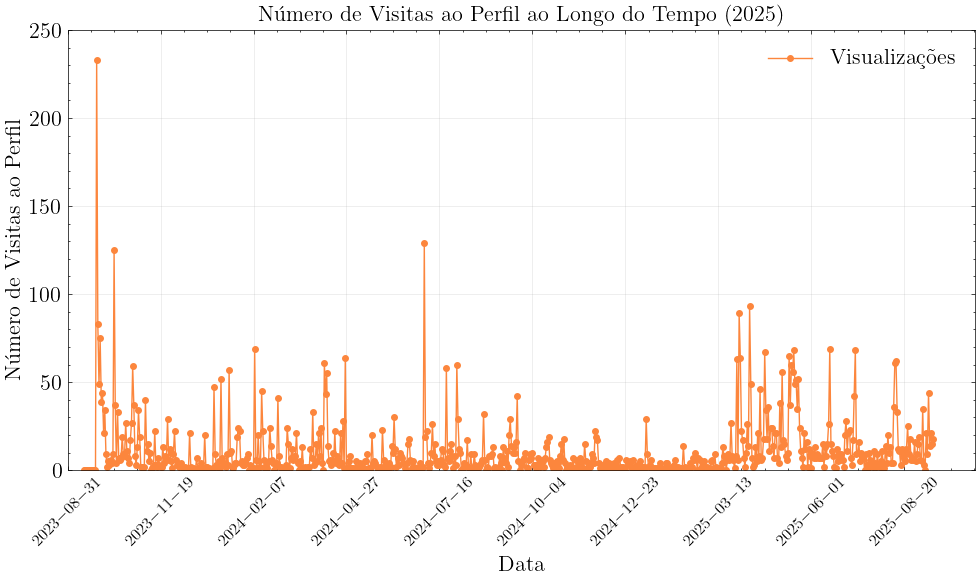

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))  # cria figura + eixos

ax.plot(visitas_['Data'], visitas_['Primary'], marker='o',ms=4, label='Visualizações',color=cor_1)

ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Número de Visitas ao Perfil',fontsize=16)
ax.set_title('Número de Visitas ao Perfil ao Longo do Tempo (2025)',fontsize=16)

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # força no máximo 10 ticks no eixo x
ax.tick_params(axis='x', rotation=45,labelsize=12)  # rotaciona os ticks do eixo x
ax.tick_params(axis='y',labelsize=16) 

ax.set_xlim([pd.to_datetime('2023-08-31'),pd.to_datetime('2025-10-20')])
ax.set_ylim([0.0,250])

ax.legend(fontsize=16)
fig.tight_layout()

plt.grid(alpha=0.3)
plt.show()

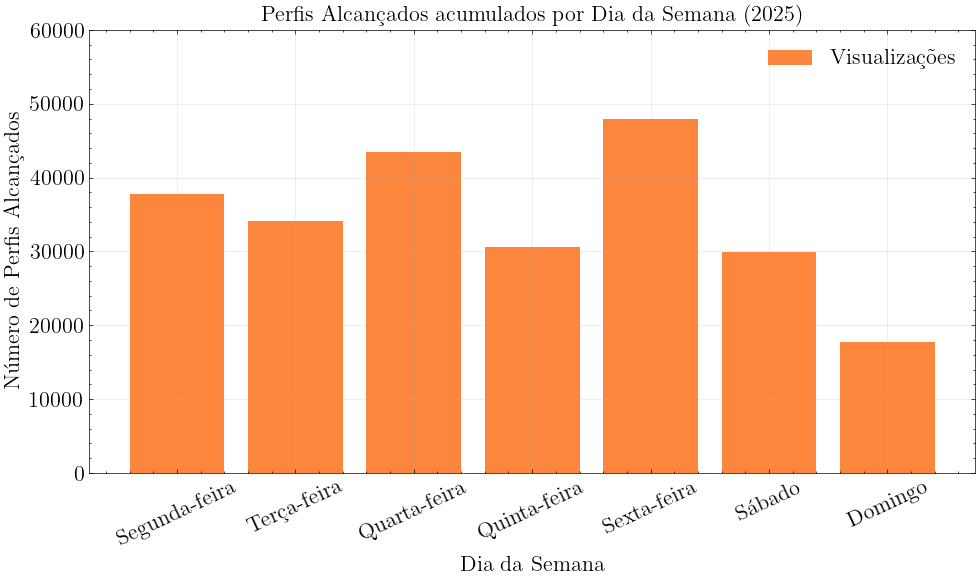

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))  # cria figura + eixos

ax.bar(alc_sem['Dia da Semana'], alc_sem['Primary'],label='Visualizações',color=cor_1)  

ax.set_xlabel('Dia da Semana',fontsize=16)
ax.set_ylabel('Número de Perfis Alcançados',fontsize=16)
ax.set_title('Perfis Alcançados acumulados por Dia da Semana (2025)',fontsize=16)

# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # força no máximo 10 ticks no eixo x
ax.tick_params(axis='x', rotation=25,labelsize=16)  # rotaciona os ticks do eixo x
ax.tick_params(axis='y',labelsize=16) 

# ax.set_xlim([pd.to_datetime('2025-02-14'),pd.to_datetime('2025-09-20')])
# ax.set_ylim([0.0,12000])

ax.legend(fontsize=16)
fig.tight_layout()

plt.grid(alpha=0.3)
plt.show()

In [22]:
# Dados de público não possuem filtro de tempo de qualquer tipo. 
# Ele é um recorte do público que segue a página no momento. 
# Tudo que podemos fazer é comparar o que mudou desde a última coleta de dados. 



In [23]:
# Dados 

# sep=,
# "Faixa etária e gênero"
# "","Mulheres","Homens"
# "18-24","21","11.9"
# "25-34","20.3","17.4"
# "35-44","12.6","6.4"
# "45-54","4.3","2.1"
# "55-64","2.2","0.9"
# "65+","0.8","0.1"

# "Principais cidades"
# "Santa Maria, RS","Porto Alegre, RS","São Paulo, SP","Divinópolis, MG","Pelotas, RS","Florianópolis, SC","Cachoeira do Sul, RS","Campinas, SP","Nova Palma, RS","Curitiba, PR"
# "68.5","1.7","1.7","1.2","1","0.8","0.7","0.7","0.6","0.6"

# "Principais países"
# "Brasil","Argentina","Estados Unidos","Portugal","Índia","Espanha","Chile","China","Itália","França"
# "97.4","0.3","0.3","0.2","0.2","0.2","0.1","0.1","0.1","0.1"



Desenhando fatia: 38.8%
Desenhando fatia: 61.2%


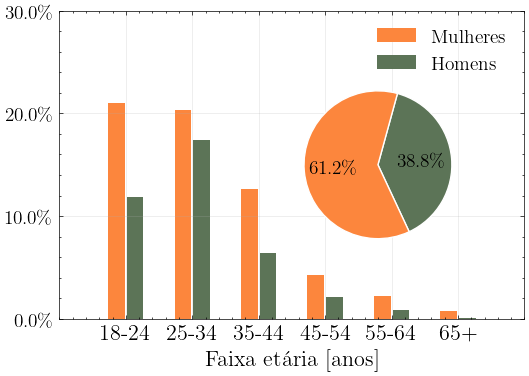

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ==== cores ====
cor_1 = '#fc863d'  # Mulheres
cor_2 = '#5C7457'  # Homens

# ==== leitura dos dados ====
csv_data = """Faixa etária e gênero,Mulheres,Homens
18-24,21,11.9
25-34,20.3,17.4
35-44,12.6,6.4
45-54,4.3,2.1
55-64,2.2,0.9
65+,0.8,0.1
"""

genero_idade_data = pd.read_csv(pd.io.common.StringIO(csv_data))
genero_idade_data.rename(columns={"Faixa etária e gênero": "Idade"}, inplace=True)

# converte para proporções
total = genero_idade_data.Mulheres.sum() + genero_idade_data.Homens.sum()
genero_idade_data["Mulheres"] = genero_idade_data.Mulheres / total
genero_idade_data["Homens"] = genero_idade_data.Homens / total

# ==== gráfico ====
fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(len(genero_idade_data.Idade))

# barras
ax.bar(x - 0.14, genero_idade_data.Mulheres, width=0.25, label='Mulheres', color=cor_1)
ax.bar(x + 0.14, genero_idade_data.Homens, width=0.25, label='Homens', color=cor_2)

ax.set_xticks(x, labels=genero_idade_data.Idade.values, fontsize=16)
ax.set_yticks(np.linspace(0, 0.3, 4), labels=["0%", "10%", "20%", "30%"], fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# pizza no inset
sizes = np.array([genero_idade_data.Homens.sum(), genero_idade_data.Mulheres.sum()])
sizes = sizes / sizes.sum()
ax_inset = inset_axes(ax, width="60%", height="60%", loc='center right')
def my_autopct(pct):
    print(f"Desenhando fatia: {pct:.1f}%")  # DEBUG no console
    return f'{pct:.1f}\%'

ax_inset.pie(
    sizes,
    labels=None,
    autopct=my_autopct,
    textprops={'color': 'black', 'fontsize': 14},
    wedgeprops=dict(width=1, edgecolor='w'),
    startangle=295,
    colors=[cor_2, cor_1]
)


ax_inset.tick_params(axis='x', labelsize=16)
ax_inset.tick_params(axis='y', labelsize=16)


ax.set_xlabel("Faixa etária [anos]", fontsize=16)
ax.legend(fontsize=14)
ax.grid(alpha=0.3)

# fig.tight_layout()
plt.savefig('../figuras/distribuicao_etaria_2025.png', dpi=300)
plt.show()
